In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
Train = pd.read_csv(r'C:\Users\haifa\Albayrak Internship\Projects\Titanic\train.csv')
Test = pd.read_csv(r'C:\Users\haifa\Albayrak Internship\Projects\Titanic\Test.csv')
combine = [Train, Test]

## 1- Describe Data

In [3]:
Train.shape

(891, 12)

In [4]:
print(Train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 Catagorical Features :
* Catagorical : Survived, Sex, Embarked
* ordinal : Pclass.

 Numerical Features :
* Continous : Age, Fare
* Discrete : SibSp, Parch

In [7]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
Train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
print(Test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [10]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
Test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 2- Missing Data

In [12]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

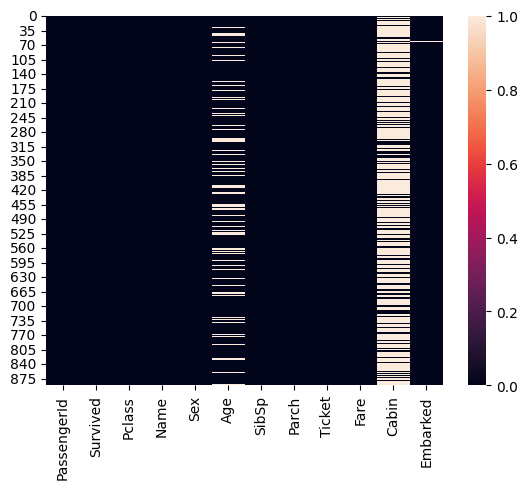

In [13]:
sns.heatmap(Train.isnull())

In [14]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3- Cleaning Data

In [15]:
def clean(d):
  d.drop(['Ticket', 'Cabin', 'Name','Embarked', 'Fare'], axis=1, inplace =True)
  d.Age = d.Age.fillna(d.Age.median())
  d.dropna()
  return d

In [16]:
clean(Train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [17]:
clean(Test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<Axes: >

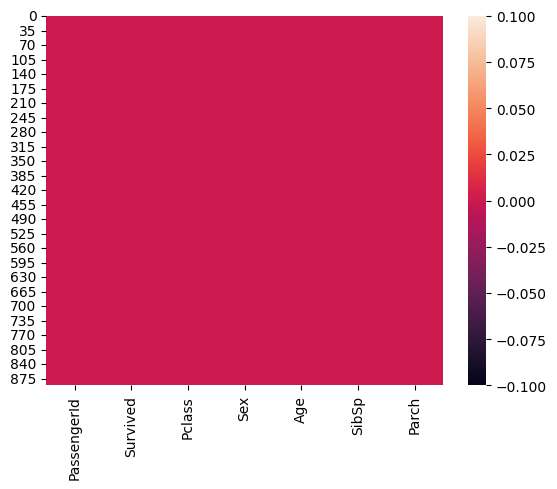

In [18]:
sns.heatmap(Train.isnull())

## 4- Data Analysis

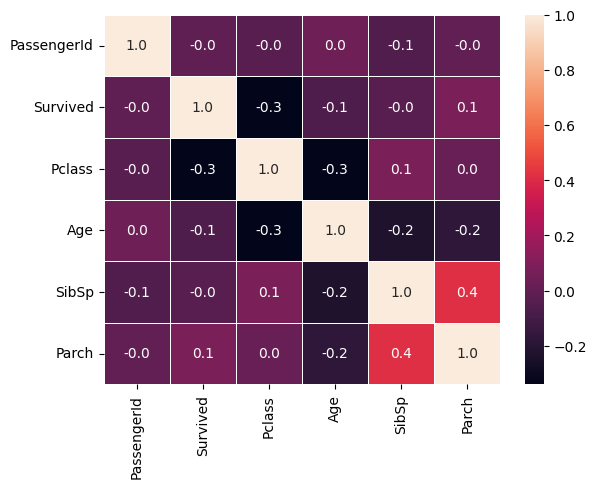

In [19]:
sns.heatmap(Train.corr(numeric_only=True), annot=True, fmt ='.1f',linewidth= .5)
plt.show()

In [20]:
Train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
Train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

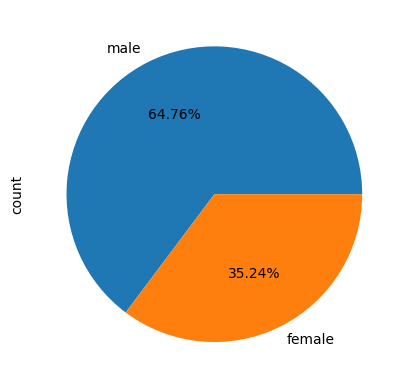

In [22]:
Train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Sex', ylabel='count'>

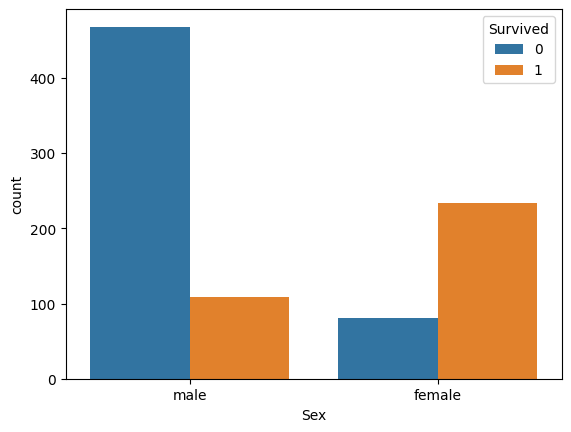

In [23]:
sns.countplot(x='Sex',hue='Survived', data=Train)


In [24]:
Train.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

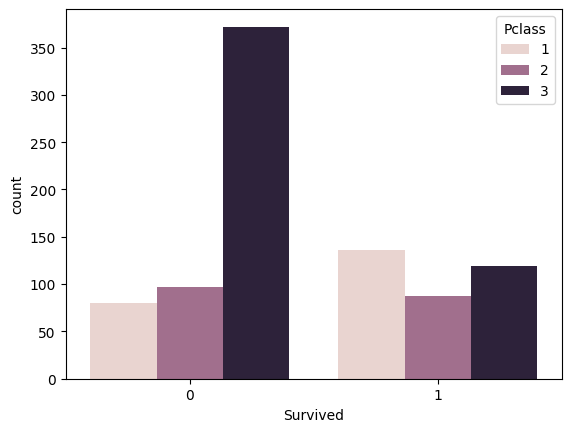

In [25]:
sns.countplot(x='Survived',hue='Pclass', data=Train)

<Axes: xlabel='Age', ylabel='Count'>

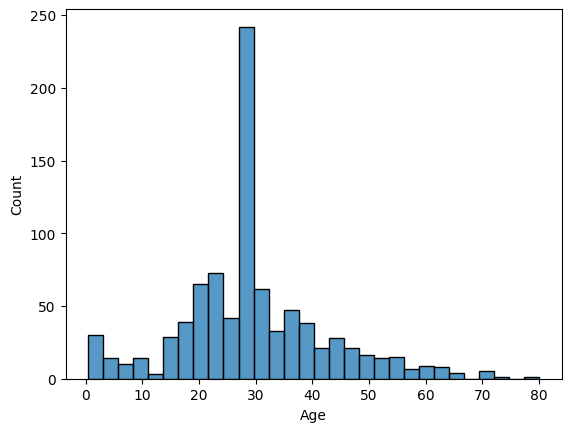

In [26]:
sns.histplot(Train.Age)

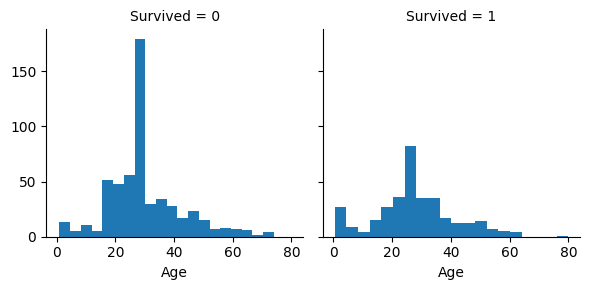

In [27]:
g = sns.FacetGrid(Train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<Axes: xlabel='SibSp', ylabel='count'>

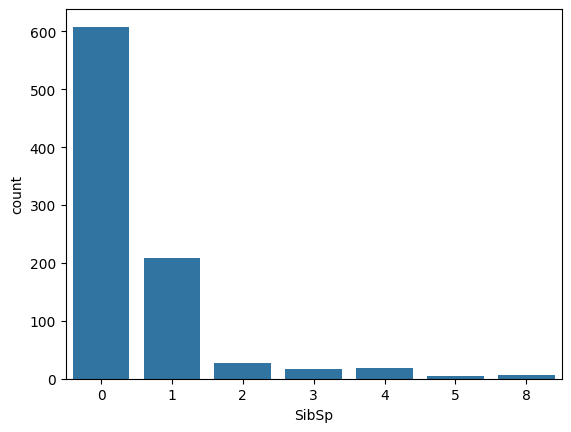

In [28]:
sns.countplot(x='SibSp', data=Train)

## 5- Transform Data

In [29]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [30]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0


In [31]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,34.5,0,0
1,893,3,1,47.0,1,0
2,894,2,0,62.0,0,0
3,895,3,0,27.0,0,0
4,896,3,1,22.0,1,1


## 6- Create Model

In [32]:
x = Train.drop(['Survived'],axis =1)
y = Train.Survived

In [33]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x,y,train_size=.8)

In [34]:
model1=DecisionTreeClassifier()
model1.fit(x_Train, y_Train)

DecisionTreeClassifier()

In [35]:
accuracies =[]

In [36]:
def all(model):
    model.fit(x_Train, y_Train)
    pre = model.predict(x_Test)
    accuracy =accuracy_score(pre,y_Test)
    print('Accuracy =', accuracy)
    accuracies.append(accuracy)

In [37]:
model1 = LogisticRegression()
all(model1)

Accuracy = 0.7877094972067039


c:\Users\haifa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
model2 = RandomForestClassifier()
all(model2)

Accuracy = 0.7988826815642458


In [39]:
model3 = GradientBoostingClassifier()
all(model3)

Accuracy = 0.7932960893854749


In [40]:
model4 = DecisionTreeClassifier()
all(model4)

Accuracy = 0.7262569832402235


In [41]:
model5 = KNeighborsClassifier()
all(model5)

Accuracy = 0.5586592178770949


In [42]:
model6 = GaussianNB()
all(model6)

Accuracy = 0.770949720670391


In [43]:
model7 = SVC()
all(model7)

Accuracy = 0.6424581005586593


In [44]:
algorithms =['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier',
            'KNeighborsClassifier', 'GaussianNB', 'SVC']

In [45]:
new = pd.DataFrame({'algorithms' : algorithms , 'accuracies' : accuracies})

In [46]:
new

,algorithms,accuracies
0,LogisticRegression,0.787709
1,RandomForestClassifier,0.798883
2,GradientBoostingClassifier,0.793296
3,DecisionTreeClassifier,0.726257
4,KNeighborsClassifier,0.558659
5,GaussianNB,0.770950
6,SVC,0.642458


In [47]:
modelF= GradientBoostingClassifier()
modelF.fit(x_Train, y_Train)

GradientBoostingClassifier()

In [48]:
Fpre=modelF.predict(Test)

In [49]:
Final=Test.PassengerId

In [50]:
newData = pd.DataFrame({'PassengerId' : Final , 'Survived' : Fpre})

In [51]:
newData.to_csv('output.csv', index=False)

In [52]:
newData

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
